# Анализ бизнес-показателей развлекательного приложения

**Описание проекта**

Последние несколько месяцев компания - развлекательное приложение, несмотря на огромные вложения в рекламу, терпит убытки. 

Для анализа ситуации есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
* лог сервера с данными об их посещениях,
* выгрузка их покупок за этот период,
* рекламные расходы.

Необходимо изучить:

* откуда приходят пользователи и какими устройствами они пользуются,
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент,
* когда расходы на привлечение клиента окупаются,
* какие факторы мешают привлечению клиентов.

**Цель исследования**

Необходимо разобраться в причинах убытков и помочь компании выйти в плюс.

 **Ход исследования**
 
 1. Обзор и подготовка данных к анализу.
 2. Подготовка функций для анализа данных.
 3. Исследовательский анализ данных.
 4. Маркетинг.
 5. Оценка окупаемости рекламы.
 6. Общий вывод.

## Обзор и подготовка данных к анализу

В этом разделе проведем обзор и подготовку данных к анализу:
1. Выгрузим и познакомимся с данными.
2. Найдем и устраним недочеты в данных.

Составим первое представление о данных. Импортируем необходимые для анализа библиотеки.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

Познакомимся с данными. Для этого создадим функцию, которая выводит общую информацию о данных, а также проверяет данные на пропуски и дубликаты:

In [3]:
def df_info(df):
    print('Познакомимся с данными')
    display(df.head())
    print()
    print('Посмотрим сводную информация о данных')
    print()
    df.info()
    print()
    print("Проверим данные на пропуски и дубликаты")
    print()
    print("Доля пропусков:")
    display(df.isna().mean().round(2))
    print()
    print("Количество дубликатов:", df.duplicated().sum()) 

**Загрузим и познакомимся с данными о посещениях сайта.** 

In [4]:
df_info(visits)

Познакомимся с данными


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40



Посмотрим сводную информация о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB

Проверим данные на пропуски и дубликаты

Доля пропусков:


User Id          0.0
Region           0.0
Device           0.0
Channel          0.0
Session Start    0.0
Session End      0.0
dtype: float64


Количество дубликатов: 0


Итак, таблица содержит логи сервера с информацией о посещениях сайта и состоит из 6 столбцов и 309901 строк. Данные представлены в 5 категориальных и 1 количественном признаке. Пропусков и дубликатов в данных нет.

Согласно документации к данным:

* `User Id` — уникальный идентификатор пользователя,
* `Region` — страна пользователя,
* `Device` — тип устройства пользователя,
* `Channel` — идентификатор источника перехода,
* `Session Start` — дата и время начала сессии,
* `Session End` — дата и время окончания сессии.

**Загрузим и познакомимся с данными о покупках.** 

In [5]:
df_info(orders)

Познакомимся с данными


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99



Посмотрим сводную информация о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB

Проверим данные на пропуски и дубликаты

Доля пропусков:


User Id     0.0
Event Dt    0.0
Revenue     0.0
dtype: float64


Количество дубликатов: 0


Посмотрим данные о покупках, нет ли там аномалий?

In [6]:
orders['Revenue'].describe()

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: Revenue, dtype: float64

Итак, таблица содержит информацию о покупках и состоит из 3 столбцов и 40212 строк. Данные представлены в 1 категориальным и 2 количественными признаками. Пропусков и дубликатов в данных нет.

Согласно документации к данным:

* `User Id` — уникальный идентификатор пользователя,
* `Event Dt` — дата и время покупки,
* `Revenue` — сумма заказа.

**Загрузим и познакомимся с данными о расходах на рекламу.** 

In [7]:
df_info(costs)

Познакомимся с данными


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1



Посмотрим сводную информация о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB

Проверим данные на пропуски и дубликаты

Доля пропусков:


dt         0.0
Channel    0.0
costs      0.0
dtype: float64


Количество дубликатов: 0


Посмотрим нет ли аномалий в расходах?

In [8]:
costs['costs'].describe()

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

Итак, таблица содержит информацию о расходах на рекламу и состоит из 3 столбцов и 1800 строк. Данные представлены в 2 категориальными и 1 количественным признаками. Пропусков и дубликатов в данных нет.

Согласно документации к данным:

* `Channel` — идентификатор рекламного источника,
* `Dt` — дата проведения рекламной кампании,
* `Costs` — расходы на эту кампанию.

**Вывод**

Видны следующие недочеты во входных данных:

1. Нарушение стиля в названиях столбцов - строчные буквы сочетаются с прописными, а также исключим пробелы и приведем все названия к единому стилю.
2. Столбцы:
* `Session Start`, 
* `Session End`,
* `Event Dt`,
* `Dt`

нуждается в корректировки формата даты и преобразовании в datetime.

Чтобы двигаться дальше, необходимо устранить проблемы в данных.

Для начала приведем к "змеиному стилю" все названия столбцов. Для удобства напишем функцию.

In [9]:
"""
функция принимает название столбца и переводит все буквы в нижний регистр
при обнаружении пропуска заменяет его на нижнее подчеркивание
"""
def rename_columns(df):
    print("Первоначальные названия столбцов:", df.columns)
    df.columns = df.columns.str.lower().str.replace(" ", "_")
    print("Названия столбцов после изменения:", df.columns)

In [10]:
rename_columns(visits)

Первоначальные названия столбцов: Index(['User Id', 'Region', 'Device', 'Channel', 'Session Start',
       'Session End'],
      dtype='object')
Названия столбцов после изменения: Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')


In [11]:
rename_columns(orders)

Первоначальные названия столбцов: Index(['User Id', 'Event Dt', 'Revenue'], dtype='object')
Названия столбцов после изменения: Index(['user_id', 'event_dt', 'revenue'], dtype='object')


In [12]:
rename_columns(costs)

Первоначальные названия столбцов: Index(['dt', 'Channel', 'costs'], dtype='object')
Названия столбцов после изменения: Index(['dt', 'channel', 'costs'], dtype='object')


Наведем порядок в датах, приведем их к `datetime`. 

In [13]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

## Подготовка функций для анализа данных.

### Функция для создания пользовательских профилей - `get_profiles`

In [14]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения каждого пользователя в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Функция для расчёта удержания - `get_retention`

In [15]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчёта конверсии - `get_conversion`

In [16]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчёта LTV и ROI - `get_ltv`

In [17]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Функция для сглаживания фрейма - filter_data

In [18]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### Функция для визуализации удержания - `plot_retention`

In [19]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

### Функция для визуализации конверсии - `plot_conversion`

In [20]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Функция для визуализации LTV и ROI - `plot_ltv_roi`

In [21]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(23, 14))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend(fontsize=12)
    plt.xlabel('Лайфтайм', fontsize=16)
    plt.title('LTV', fontsize=22)

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения', fontsize=16)
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon), fontsize=19)

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения', fontsize=16)
    plt.title('Динамика стоимости привлечения пользователей', fontsize=19)

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend(fontsize=12)
    plt.xlabel('Лайфтайм', fontsize=16)
    plt.title('ROI', fontsize=22)

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения', fontsize=16)
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon), fontsize=19)

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

В этом разделе проведем исследовательский анализ данных :

1. Создадим пользовательские профили.
2. Определим минимальную и максимальную даты привлечения пользователей.
3. Определим лидерство стран среди платящих пользователей.
4. Определим лидерство девайсов среди платящих пользователей.
5. Определим лидерство рекламных источников.
6. Сделаем промежуточные выводы.

**1. Создание пользовательских профилей**

Создадим пользовательские профили и определим минимальную и максимальную даты привлечения пользователей.
Для этого вызовем функцию `get_profiles()`, передав ей данные о посещениях сайта, покупках и расходах на рекламу.

In [22]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Определим минимальную и максимальную даты привлечения пользователей.

In [23]:
print("Минимальная дата привлечения пользователей:", profiles['dt'].min())
print("Максимальная дата привлечения пользователей:", profiles['dt'].max())

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


Анализируемый период привлечения пользователей полностью соответствует вводным данным по проекту.

**2. Определение лидерства стран среди платящих пользователей**

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и процент платящих из каждой страны.

In [24]:
report_country = (
    profiles
    .groupby('region')
    .agg({'user_id':'nunique', 
          'payer':['sum', 'mean']})
)
report_country.columns = ['users_count', 'payers_count', 'payers_percent']
report_country['payers_percent'] = (report_country['payers_percent'] *100).round(1)
report_country.sort_values(by='users_count', ascending=False)

,users_count,payers_count,payers_percent
region,,,
United States,100002,6902,6.9
UK,17575,700,4.0
France,17450,663,3.8
Germany,14981,616,4.1


**Вывод**

На `Америку` приходится большая часть всех пользователей приложения "Procrastinate Pro+". Такая же картина и с долей платящих пользователей. Меньше всего пользователей из `Германии`, при этом доля платящих пользователей из Германии больше, чем во Франции и Британии.

**3. Определение лидерства девайсов среди платящих пользователей**

Выясним, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и процент платящих для каждого устройства.

In [25]:
report_device = (
    profiles
    .groupby('device')
    .agg({'user_id':'nunique', 
          'payer':['sum', 'mean']})
)
report_device.columns = ['users_count', 'payers_count', 'payers_percent']
report_device['payers_percent'] = (report_device['payers_percent'] * 100).round(1)
report_device.sort_values(by='users_count', ascending=False)

,users_count,payers_count,payers_percent
device,,,
iPhone,54479,3382,6.2
Android,35032,2050,5.9
PC,30455,1537,5.0
Mac,30042,1912,6.4


**Вывод**

В нашем исследовании любители "яблочных" продуктов лидируют и в количественном, и в качественном выражении: общее количество и доля платящих пользователей `Iphone` и `Mac` выше, чем у пользователей `Android` и `PC`.

**4. Определение лидерства рекламных источников**

Проанализируем рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и процент платящих пользователей для каждого канала привлечения.

In [26]:
report_channel = (
    profiles
    .groupby('channel')
    .agg({'user_id':'nunique', 
          'payer':['sum', 'mean']})
)
report_channel.columns = ['users_count', 'payers_count', 'payers_percent']
report_channel['payers_percent'] = (report_channel['payers_percent'] * 100).round(1)
report_channel.sort_values(by='users_count', ascending=False)

,users_count,payers_count,payers_percent
channel,,,
organic,56439,1160,2.1
FaceBoom,29144,3557,12.2
TipTop,19561,1878,9.6
OppleCreativeMedia,8605,233,2.7
LeapBob,8553,262,3.1
WahooNetBanner,8553,453,5.3
RocketSuperAds,4448,352,7.9
MediaTornado,4364,156,3.6
YRabbit,4312,165,3.8


In [27]:
# найдем общее количество привлеченных пользователей 
all_users = report_channel['users_count'].sum()
all_users

150008

In [28]:
# найдем общее количество платящих привлеченных пользователей 
all_payers = report_channel['payers_count'].sum()
all_payers

8881

**Вывод**

Лидер по количеству привлеченных пользователей - `Organic` — естественный, органический трафик - 56439 пользователей. Однако уровень платящих пользователей среди них, увы, самый низкий - всего 2%. 

По-настоящему "качественных" пользователей привлекает источник `FaceBoom` - здесь и высокий уровень общего количества привлеченных пользователей - 29144 пользователя, и самая высокая доля платящих пользователей - 12,2% по сравнению с другими источниками. 

Меньше всего пользователей привлекает источник `lambdaMediaAds` - 2149, тем не менее доля платящих среди этих пользователей находится на хорошем уровне в 10,4%

## Маркетинг

В этом разделе проведем маркетинговый анализ:
1. Посчитаем общую сумму расходов на маркетинг.
2. Рассчитаем и визуализируем изменение трат рекламного бюджета на каждый источник.
3. Рассчитаем среднюю стоимость привлечения пользователя из каждого источника.
4. Рассчитаем средний CAC на пользователя для всего проекта.
5. Сделаем промежуточные выводы.

**1. Посчитаем общую сумму расходов на маркетинг и выясним, как траты распределены по источникам. Визуализируем изменения метрик во времени.**

In [29]:
# посчитаем общую сумму расходов на маркетинг
profiles['acquisition_cost'].sum().round(2)

105497.3

In [30]:
# посмотрим, как эти расходы распределены по источникам
profiles_costs = (
    profiles
    .groupby('channel')
    .agg({'acquisition_cost':'sum'})
    .sort_values(by='acquisition_cost', ascending=False)
)
profiles_costs

,acquisition_cost
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


**2. Визуализируем изменения метрик.**

Посмотрим на распределение рекламного бюджета по источникам привлечения за весь период.

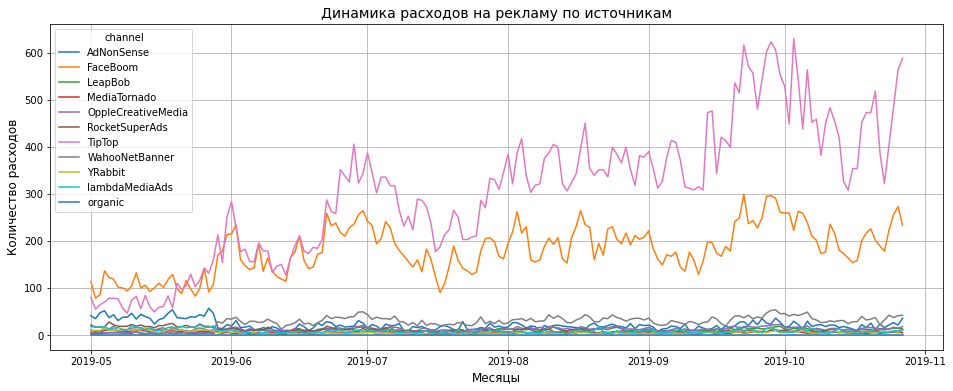

In [31]:
(
    profiles
    .pivot_table(index = 'dt', 
                 columns='channel', 
                 values='acquisition_cost', 
                 aggfunc='sum')
    .plot(grid=True, figsize=(16,6))
)
plt.title('Динамика расходов на рекламу по источникам', fontsize=14)
plt.xlabel('Месяцы', fontsize=12)
plt.ylabel('Количество расходов', fontsize=12)
plt.show()

Посмотрим на распределение рекламного бюджета по источникам привлечения по месяцам.

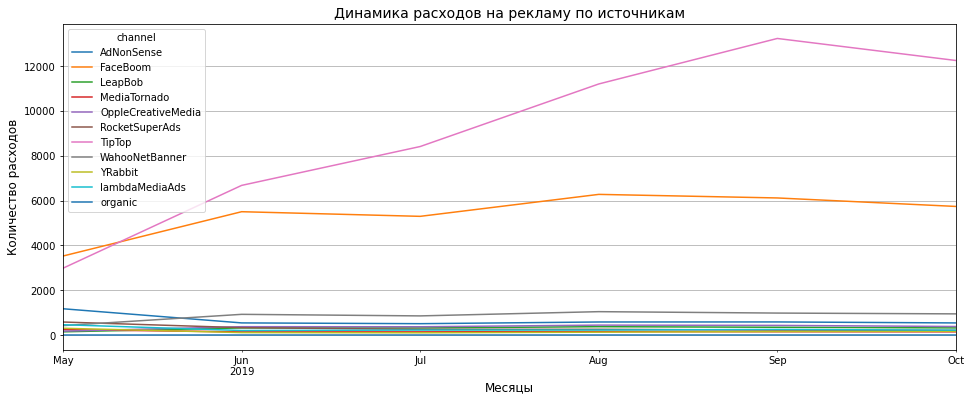

In [32]:
(
    profiles
    .pivot_table(index = 'month', 
                 columns='channel', 
                 values='acquisition_cost', 
                 aggfunc='sum')
    .plot(grid=True, figsize=(16,6))
)
plt.title('Динамика расходов на рекламу по источникам', fontsize=14)
plt.xlabel('Месяцы', fontsize=12)
plt.ylabel('Количество расходов', fontsize=12)
plt.show()

Рассчитаем распределение доли общих расходов по каждому источнику.

In [33]:
profiles_costs['costs_percent'] = (
    profiles_costs['acquisition_cost'] / profiles_costs['acquisition_cost'].sum() * 100
).round(1)

profiles_costs

,acquisition_cost,costs_percent
channel,,
TipTop,54751.30,51.9
FaceBoom,32445.60,30.8
WahooNetBanner,5151.00,4.9
AdNonSense,3911.25,3.7
OppleCreativeMedia,2151.25,2.0
RocketSuperAds,1833.00,1.7
LeapBob,1797.60,1.7
lambdaMediaAds,1557.60,1.5
MediaTornado,954.48,0.9


**3. Рассчитаем среднюю стоимость привлечения одного пользователя из каждого источника.**

In [34]:
(
    profiles
    .groupby('channel').agg({'acquisition_cost':'mean'})
    .sort_values(by='acquisition_cost', ascending=False)
)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Визуализируем распределение средней стоимости привлечения одного клиента по каждому источнику.

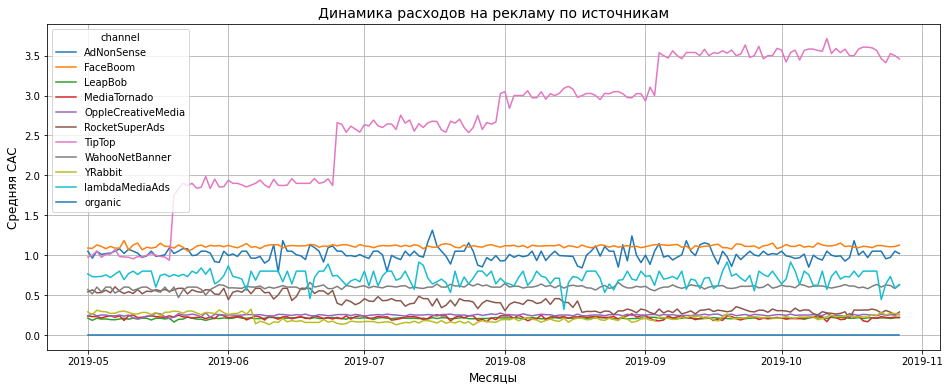

In [35]:
(
    profiles.pivot_table(index = 'dt', 
                         columns='channel', 
                         values='acquisition_cost', 
                         aggfunc='mean'
                        ).plot(grid=True, figsize=(16,6))
)
plt.title('Динамика расходов на рекламу по источникам', fontsize=14)
plt.xlabel('Месяцы', fontsize=12)
plt.ylabel('Средняя CAC', fontsize=12)
plt.show()

In [36]:
print("Минимальная CAC для источника TipTop:", round(
    profiles.query('channel == "TipTop"')['acquisition_cost']
    .min(), 2
))
print("Максимальная CAC для источника TipTop:", round(
    profiles.query('channel == "TipTop"')['acquisition_cost']
    .max(), 2
))

Минимальная CAC для источника TipTop: 0.94
Максимальная CAC для источника TipTop: 3.72


**4. Рассчитаем средний CAC на пользователя для всего проекта.**

Поскольку привлечение пользователей через органический источник Organic не стоит компании каких-либо вложений, уберем его из расчета средней CAC.

In [37]:
(
    profiles.query('channel != "organic"')['acquisition_cost'].sum() 
    / profiles.query('channel != "organic"')['user_id'].count()
).round(2)

1.13

**5. Выводы**

Общий рекламный бюджет на привлечение пользователей составляет $105 497. 

Приоритет на расходование бюджета отдан двум основным источникам привлечения:

 * `TipTop` - 52% всего рекламного бюджета, при самом высоком CAC - 2.78 доллара- за одного пользователя среди всех источников.
 * `FaceBoom` - 31% всего рекламного бюджета, при CAC - 1.11 доллара, что в 2,5 раза дешевле, чем привлечение пользователей через `TipTop`.
 
Оставшийся бюджет распределен между всеми остальными источниками. Меньше всего маркетологи вложились в источник привлечения пользователей `YRabbit`.

Также стоит отметить, что расходы на привлечение пользователей через источник `TipTop` в течение изучаемого периода постоянно росли от $0.94 в мае до 3.72 в октябре. Ни один источник привлечения клиентов не имеет такого высокого темпа роста стоимости привлечения.
         
В среднем же привлечение одного пользователя обходится компании в $1.13.

## Оценка окупаемости рекламы

В этом разделе оценим окупаемость рекламы:
1. Проанализируем общую окупаемость рекламы.
2. Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.
3. Проанализируем окупаемость рекламы с разбивкой по странам.
4. Проанализируем окупаемость рекламы с разбивкой по устройствам.
5. Построим и изучим графики конверсии и удержания с разбивкой по устройствам, странам и рекламным каналам.
6. Ответим на такие вопросы:
   * Окупается ли реклама в целом?
   * Какие устройства, страны и каналы могут снижать окупаемость рекламы?
   * Чем могут быть вызваны проблемы окупаемости?

### Анализ общей окупаемости



Используя графики LTV, ROI и CAC, проанализируем общую окупаемость рекламы. 

Момент анализа данных задан проектом - 1 ноября 2019 года, а в бизнес-плане компании заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Соотвественно горизонт анализа составляет - 14 дней. Поскольку компания абсолютно не тратит средства на привлечение пользователей через источник Organic, считаю разумным удалить их из анализа окупаемости, чтобы не искажать картину реальности.

In [38]:
# сделаем срез данных без органического источника
profiles = profiles.query('channel != "organic"')
profiles['channel'].unique()

array(['FaceBoom', 'AdNonSense', 'YRabbit', 'MediaTornado',
       'RocketSuperAds', 'LeapBob', 'TipTop', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

Установим момент и горизонт анализа данных согласно документации к проекту.

In [39]:
observation_date = datetime(2019, 10, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

1. Для начала оценим общую ситуацию — посмотрим на окупаемость рекламы. Рассчитаем и визуализируем `LTV` и `ROI`, вызвав функции `get_ltv()` и `plot_ltv_roi()`.

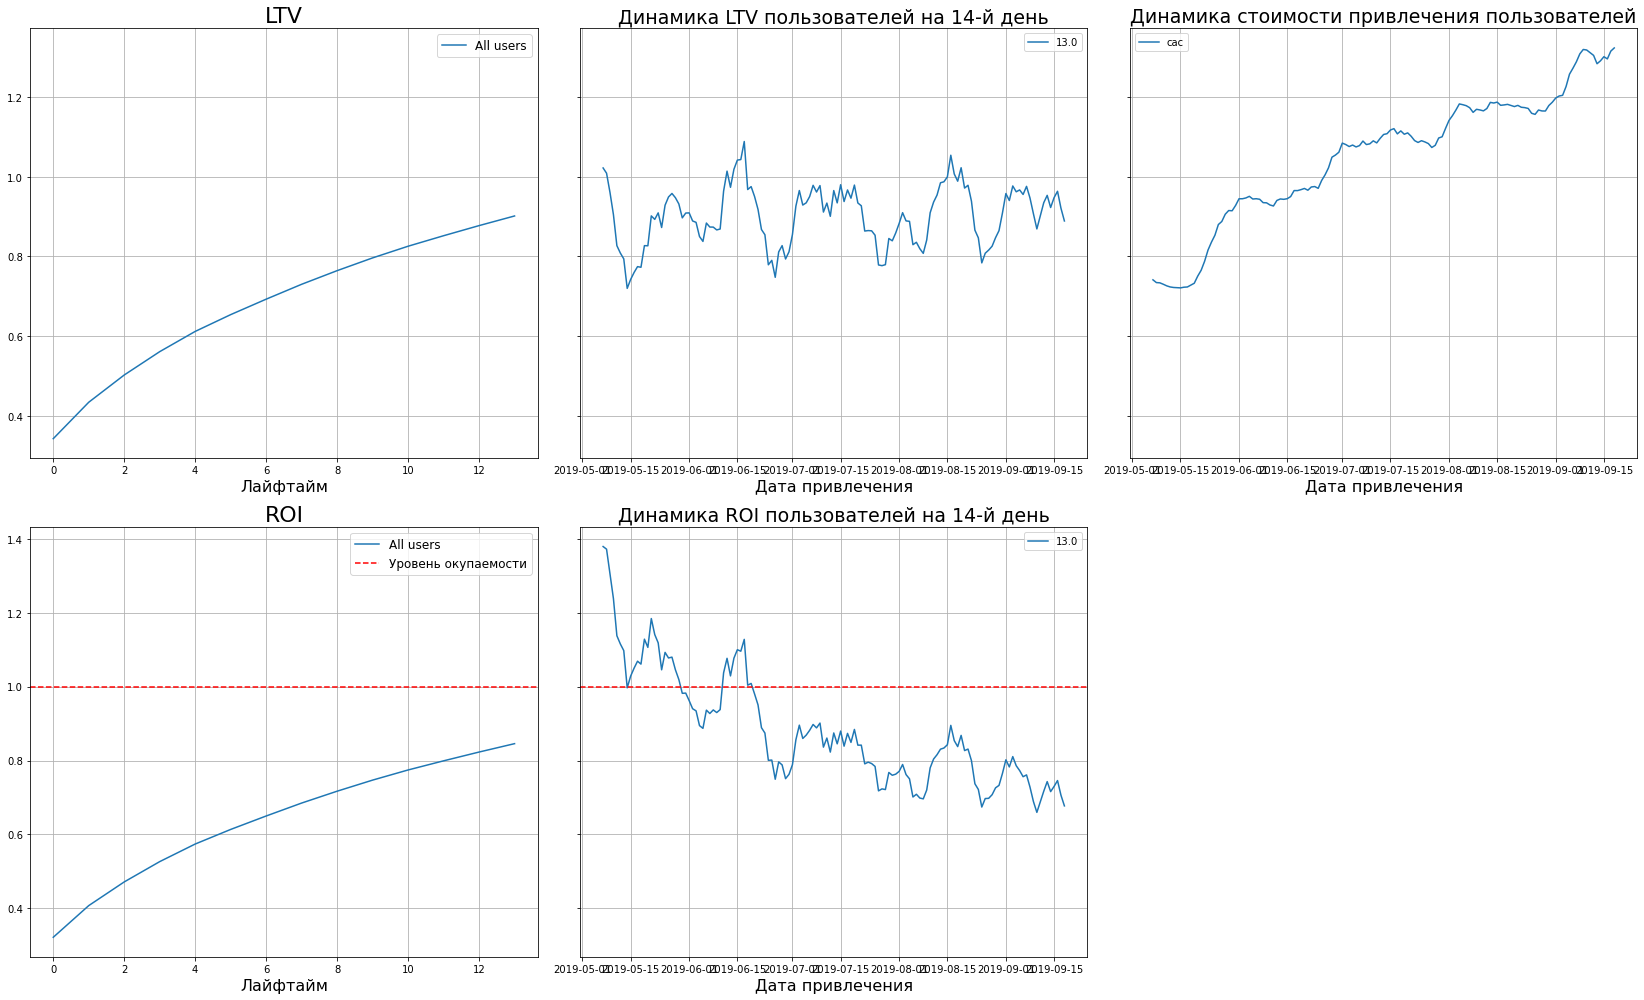

In [40]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По графикам можно сделать следующие выводы:

* Общий уровень удержания клиентов `LTV` постоянно растет, значит качество пользователей стабильно.
* `CAC` стабильно растет, значит расходы на рекламу постоянно увеличивается.
* В целом расходы на рекламу не окупаются. `ROI` в конце второй недели — чуть выше 80%.
* Видна сильная отрицательная динамика `ROI` пользователей на 14-й день.

Чтобы лучше разобраться в причинах убытков компании, пройдём по всем доступным характеристикам пользователей — стране и источнику первого посещения.

### Анализ с разбивкой по каналам

Для этого передадим параметру `dimensions` столбец `channel`.

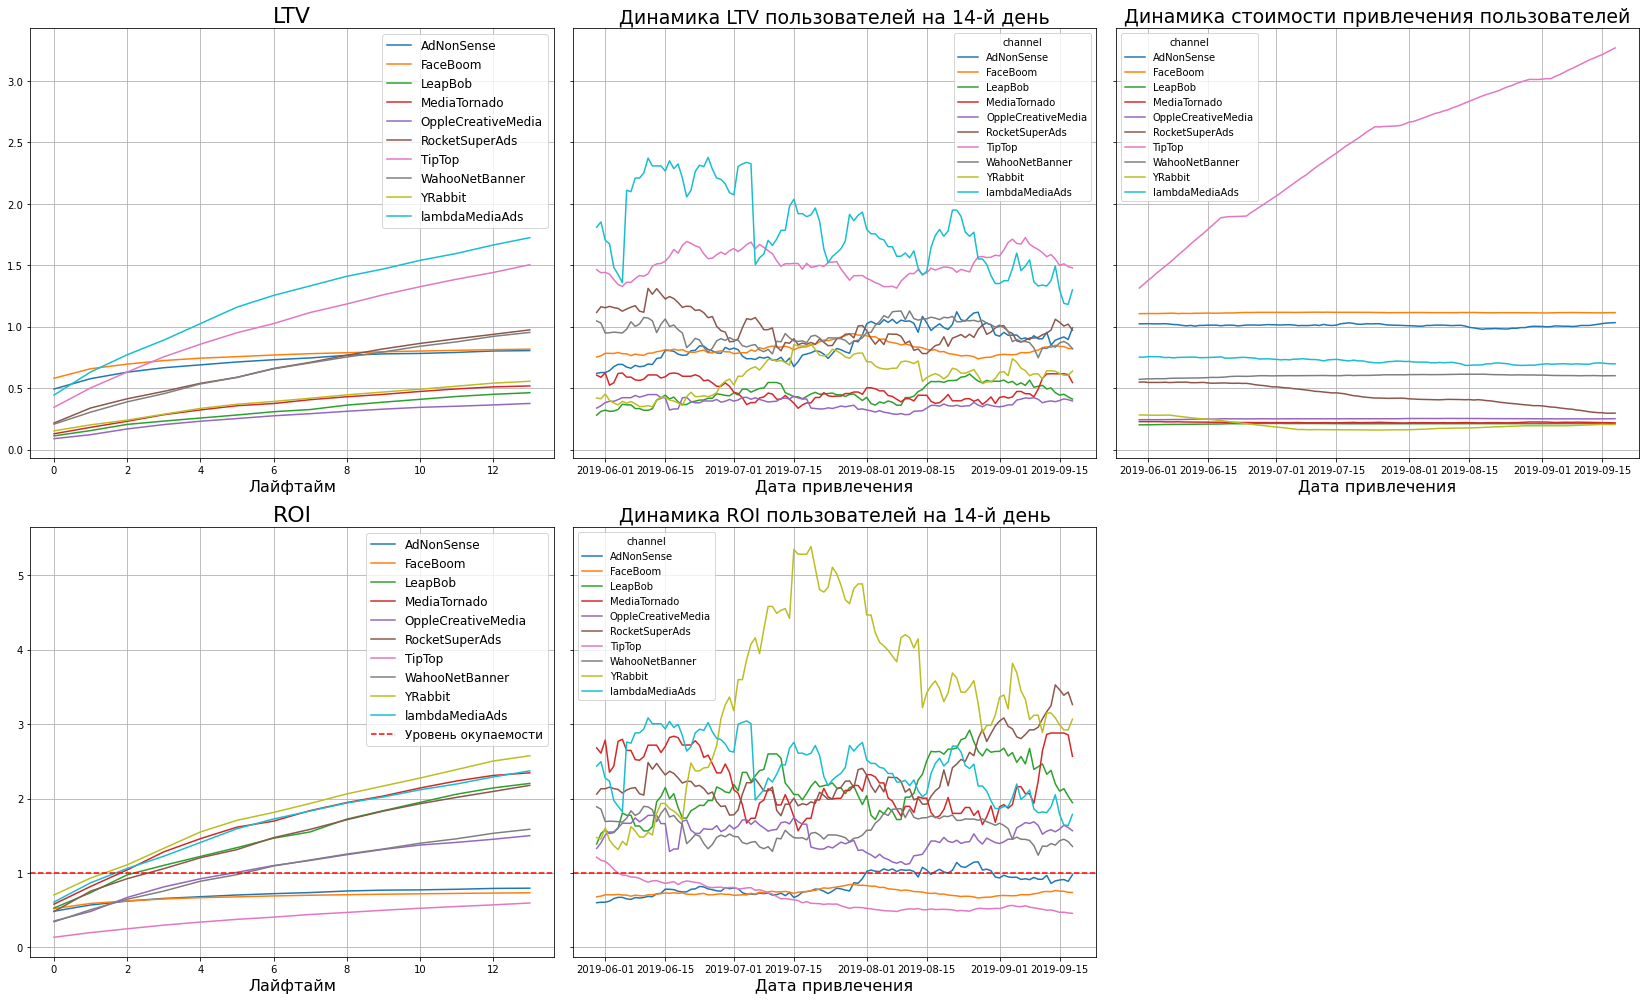

In [41]:
# смотрим окупаемость с разбивкой по рекламным каналам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=30
)

По графикам можно сделать следующие выводы:

1. Качество привлечения пользователей стабильно в большинстве источников. 
2. Однако и оно неидеально: на графике динамики с конца июля сильно просела кривая удержания клиентов из источника `lambdaMediaAds` и к концу августа опустилась ниже уровня удержания источника `TipTop`. 
3. CAC по всем источника кроме `TipTop` колеблется в разумных пределах. Тогда как расходы на `TipTop` растут экспоненциально.
4. До окупаемости далеко следующим источникам: `TipTop`, `FaceBoom` и `AdNonSense`. А помня высокую стоимость привлечения клиентов через источник `TipTop` стоит обратить на него более пристальное внимание в дальнейшем. Самый высокий показатель общей окупаемости и окупаемости в динамике показывают каналы: `YRabbit`, `lambdaMediaAds` и `MediaTornado`.
5. Динамика окупаемости источника `YRabbit` показывает затяжной скачок с пиком в середине июля. К сожалению, в рамках проекта нет возможно уточнить причину такого скачка. Расходы на привлечение клиентов через источник `TipTop` окупились только в самом начале -  в мае - дальнейшие вложения в этот источник можно считать 'Epic Fail'. В тоже время в общем неокупившийся источник `AdNonSense` тем не менее в течение августа находился ровно на границе окупаемости. На их фоне `FaceBoom` особо никак не проявил себя, постоянно оставаясь ниже линии окупаемости без резких колебаний.

### Анализ с разбивкой по странам

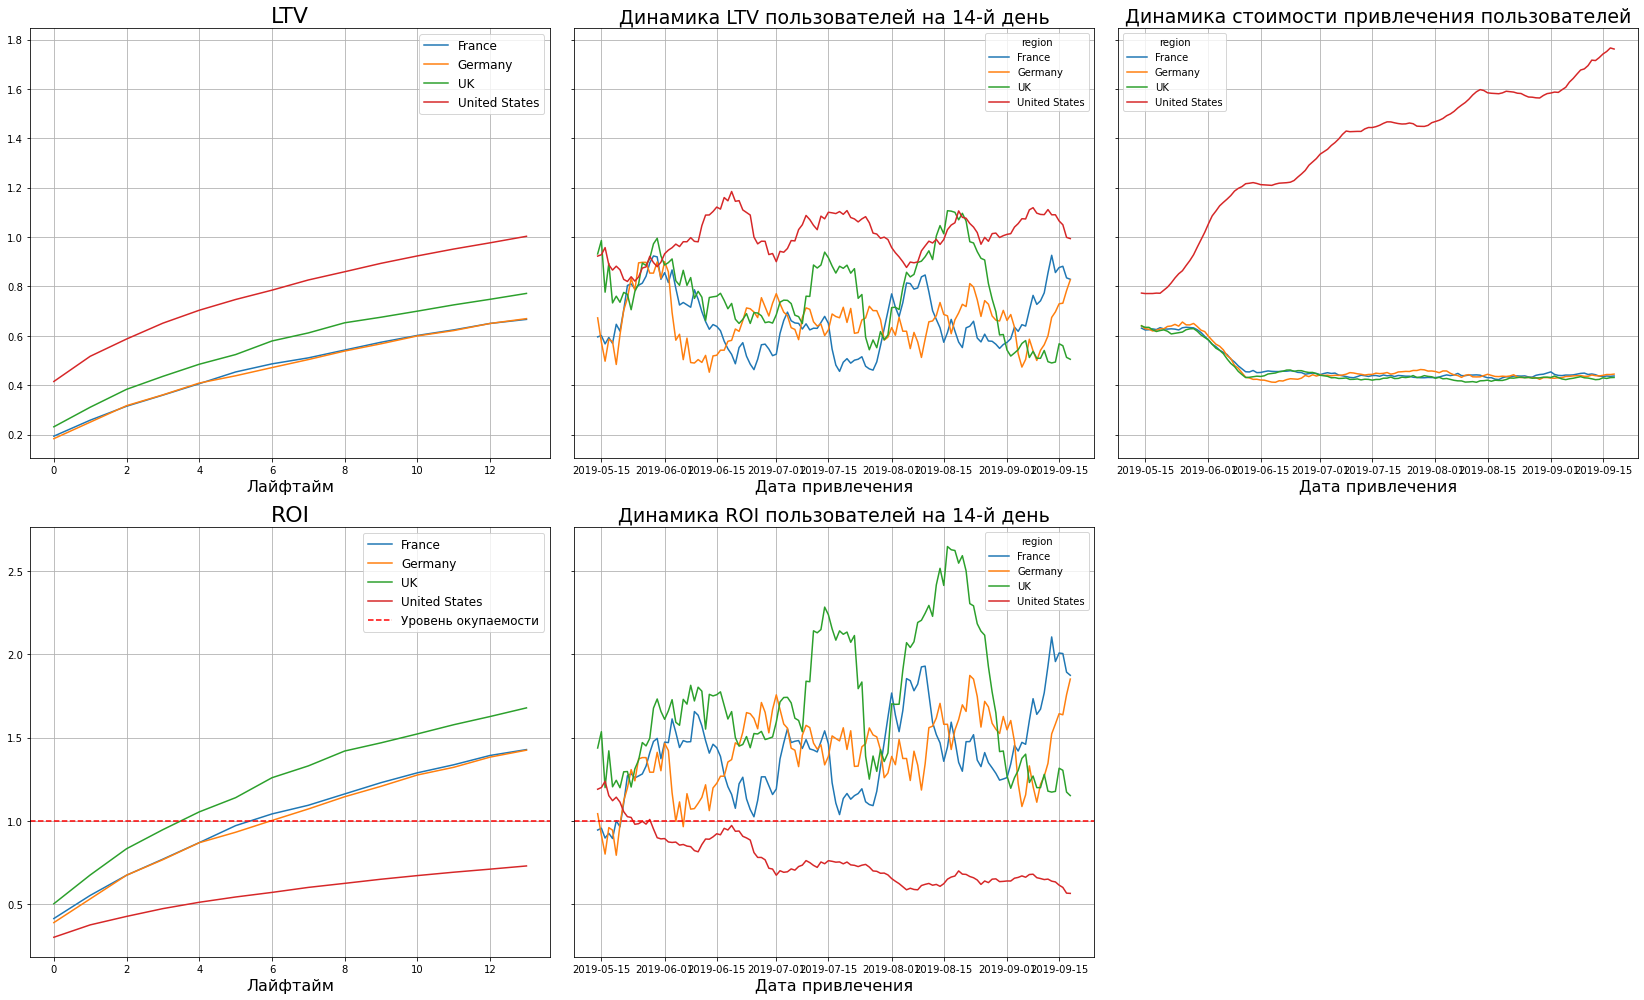

In [42]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

По графикам можно сделать следующие выводы:

1. Качество привлечения пользователей в изучаемых регионах стабильно. 
2. CAC во всех регионах кроме Америки падает в течение двух недель с конца мая до середины июня, а затем расходы фиксируется на одном уровне и находятся в константе. Тогда как Америка демонстрирует солидный и даже непомерный рост аппетита на привлечение клиентов.   
3. `ROI` демонстрирует нам, что высокая стоимость привлечения клиентов из Америки вовсе не окупается. Тогда как остальные страны уже с 3 по 6 день переходят черту окупаемости, демонстрируя устойчивый рост.
4. Динамика окупаемости расходов на рекламу в США только в первую неделю показывает рост и превышение порога окупаемости, в течение всего остального периода постоянно снижается, так больше и не дойдя до линии окупаемости. В Великобритании имеются два пика двукратной окупаемости в середине июля и середине августа. 

### Анализ с разбивкой по устройствам

Планом проекта не предусмотрен анализ окупаемости с разбивкой по девайсам. Но мне бы хотелось приоткрыть завесу тайны окупаемости и здесь. 

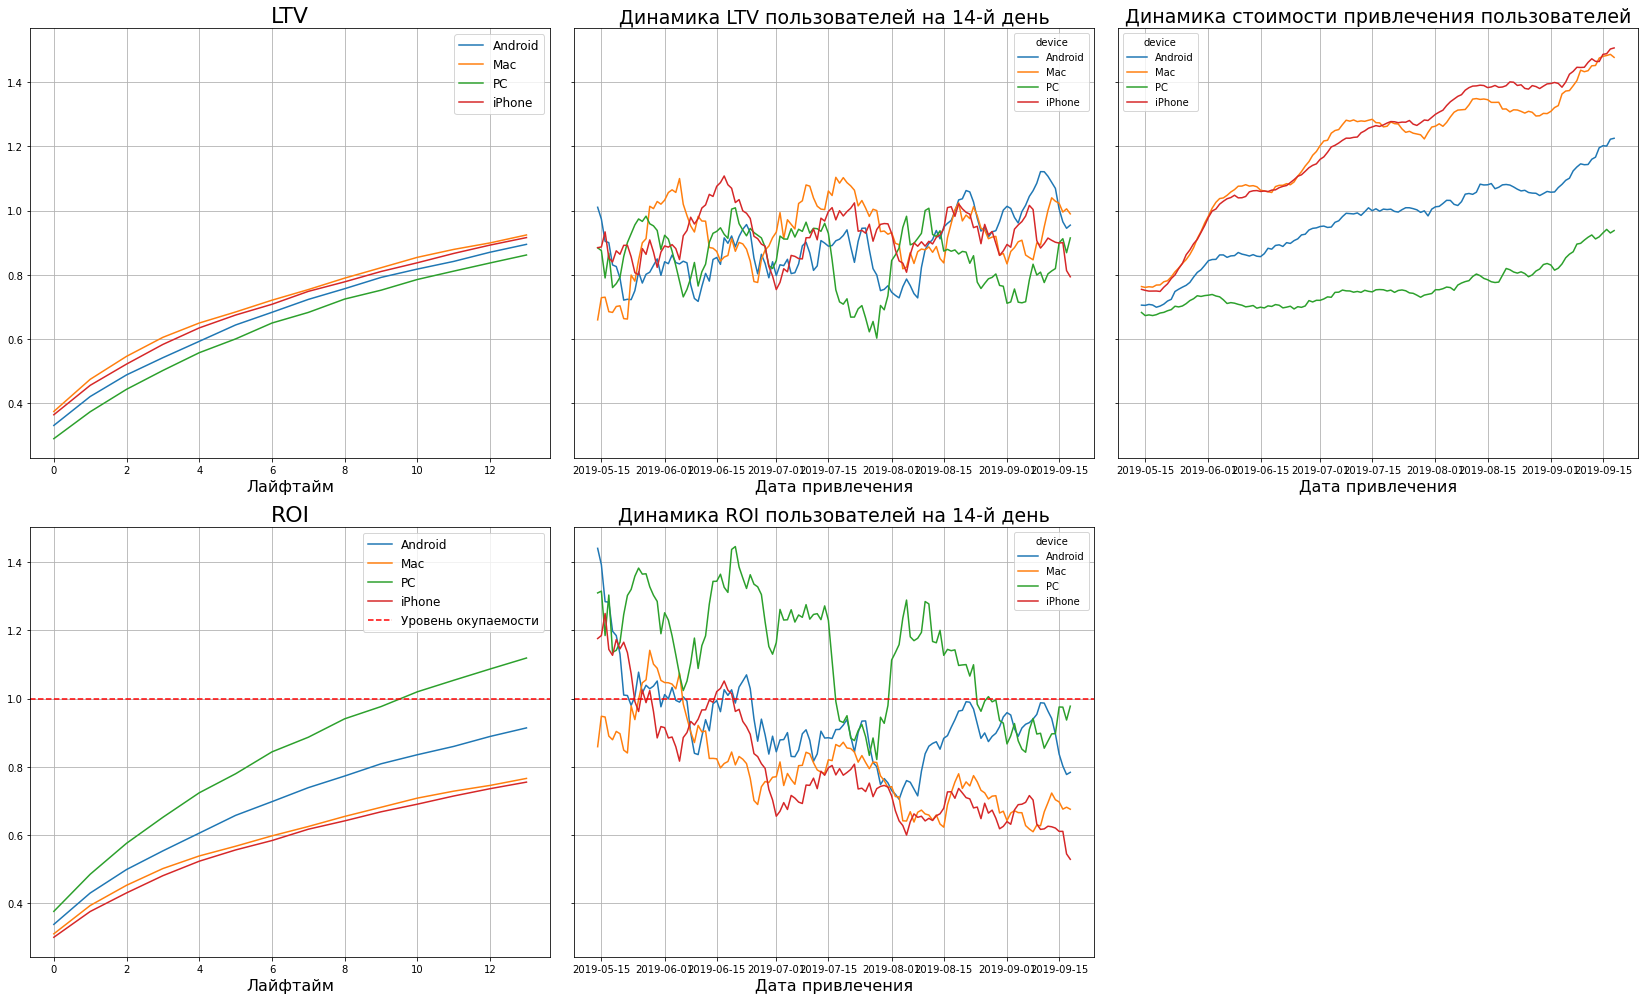

In [43]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

По графикам можно сделать следующие выводы:

1. Качество привлечения пользователей различных девайсов стабильно. 
2. Хотя динамика удержания позьзователей PC и демонстрирует падение интереса к приложению в конце июля, в целом уровень удержания достаточно стабилен.
3. Стоимость привлечения фанатов "яблочных" девайсов самая высокая. А вот пользователей PC привлечь дешевле всего.  
4. `ROI` демонстрирует нам, что окупается только привлечение пользователей PC и то только на 10-й день. 
5. Динамика окупаемости расходов на рекламу для привлечения пользователей девайсов показывает нам падение по всем видам девайсов. Даже привлечение пользователей PC не окупается в течение 2 недель с 15 июля по 1 августа и больше не демонстрирует окупаемости, начиная с 20-25 августа. 

Чтобы детальнее попробовать локализовать проблему, посмотрим на окупаемость устройств отдельно в США.

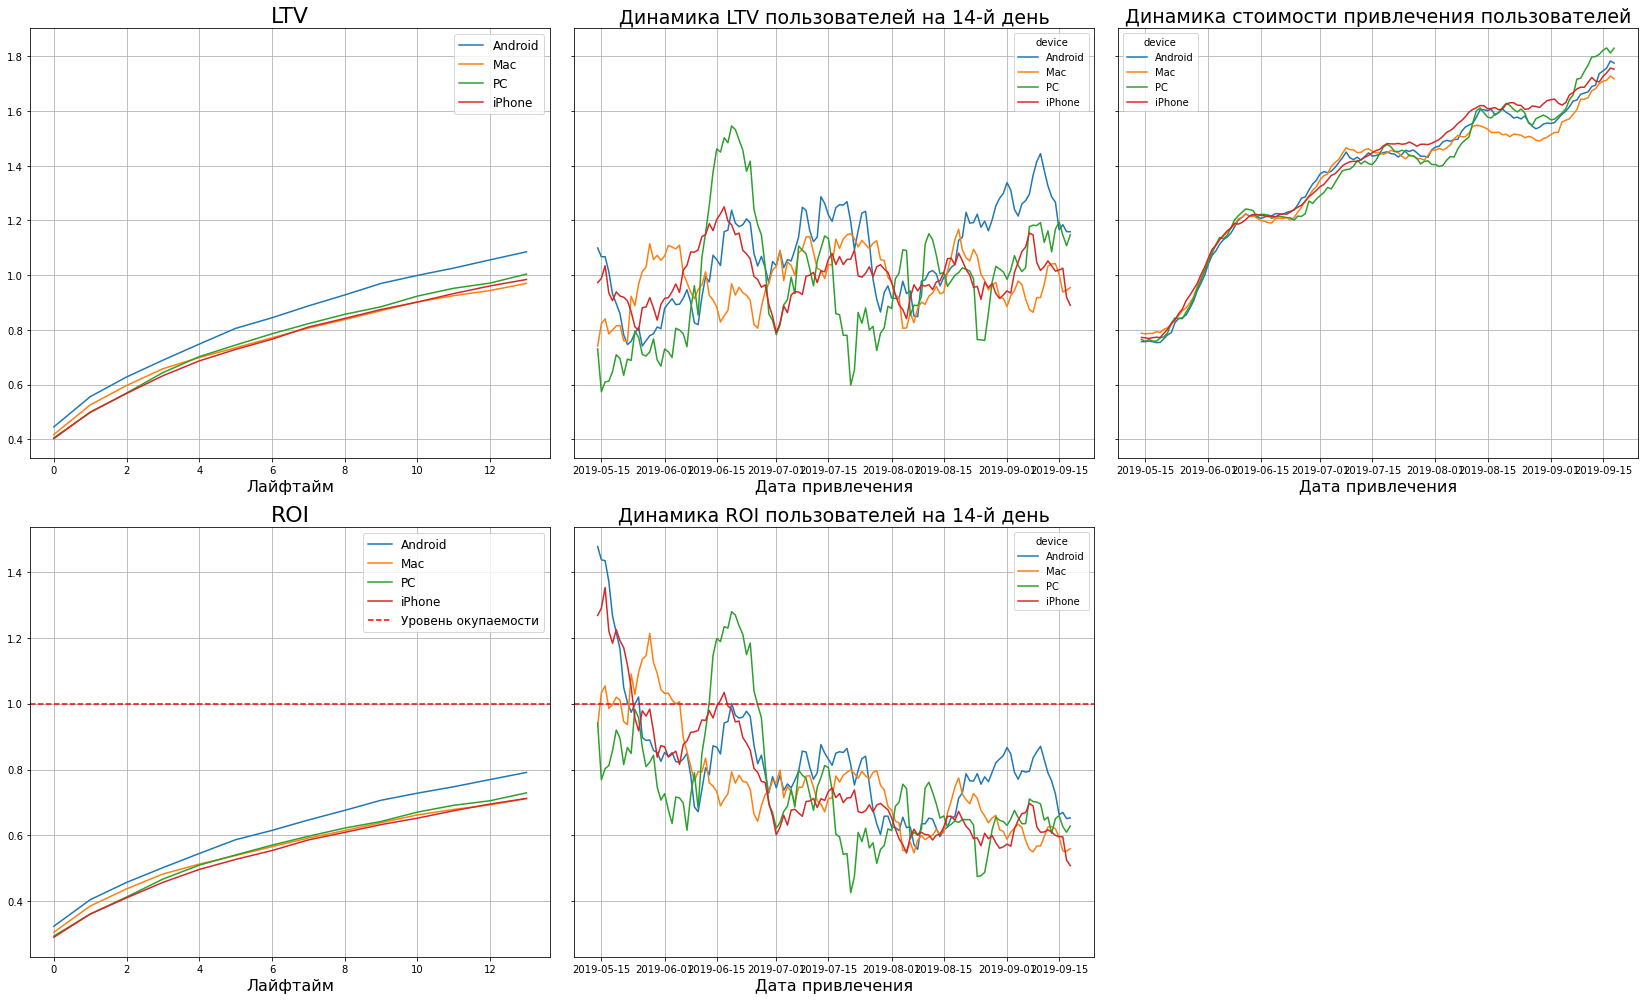

In [44]:
# смотрим окупаемость с разбивкой по устройствам в США

dimensions = ['device']
profiles_usa_device = profiles.query('region == "United States"')

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa_device, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

В целом графики повторяет общую картину окупаемости устройств в целом. С той лишь только разницей, что в Америке не окупается ни одно из устройсв, даже PC.

### Расчет и графики конверсии, удержания

В этом разделе построим и изучим графики конверсии и удержания с разбивкой по устройствам, странам и рекламным каналам.

Попробуем узнать, в чём причина убытков компании: в низкой конверсии или низком удержании.Посчитаем и визуализируем конверсию, вызвав функции `get_conversion()` и `plot_conversion()`.

**1. Начнем с анализа конверсии и удержания с разбивкой по устройствам**.

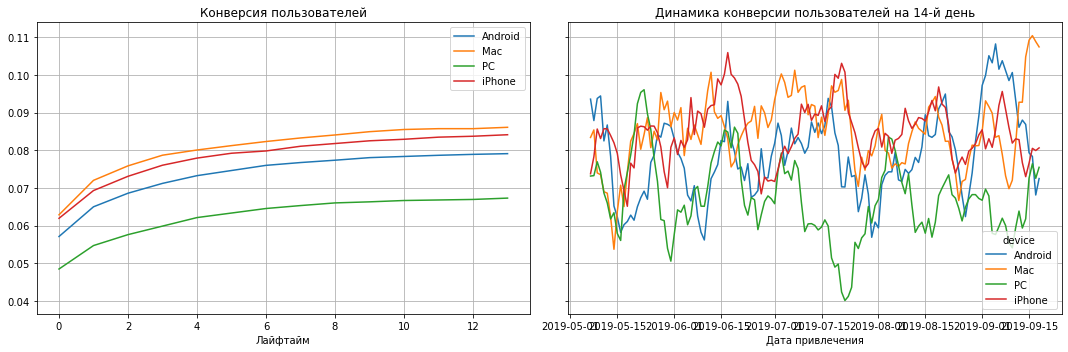

In [45]:
# посмотрим конверсию с разбивкой по устройствам

dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Судя по графикам, пользователи iPhone и Mac конвертируются очень хорошо, тогда как хуже всех конвертируются пользовавели PC. Возможно, дело в удержании. Вызовем функции get_retention() и plot_retention(), чтобы рассчитать и отразить на графиках этот показатель.

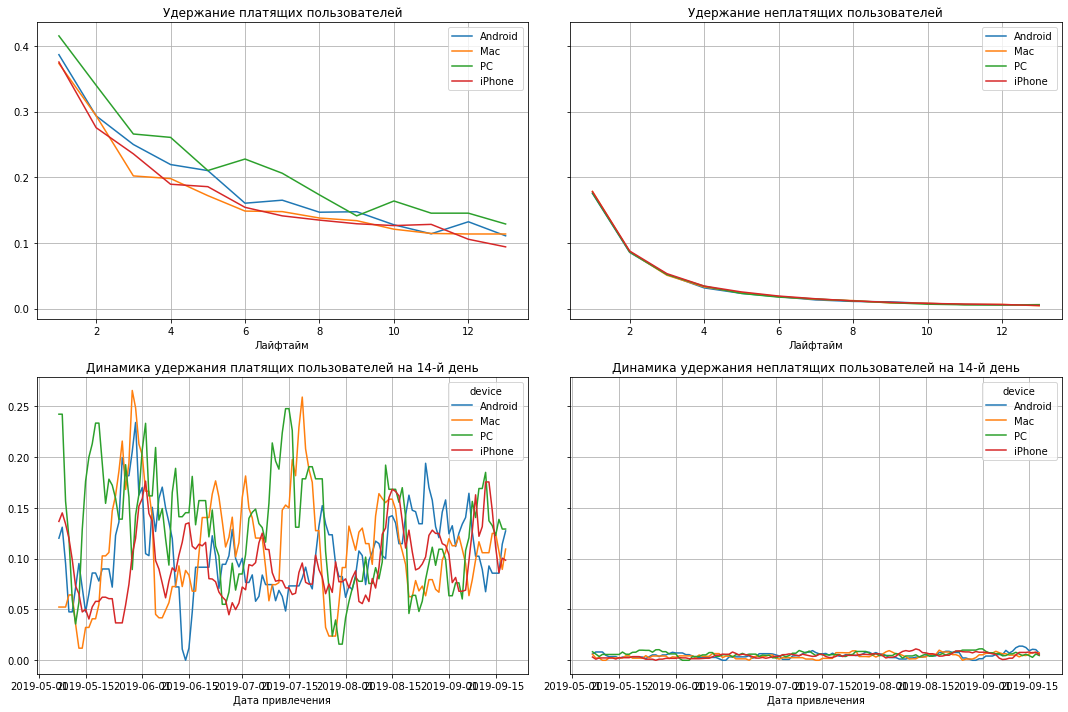

In [46]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

В целом уровень удержания на всех устройствах для пользователей примерно одинаковый. 

Поскольку низкие показатели по Америке являются дополнительным пунктом нашего пристального внимания, посмотрим на анализ конверсии и удержания по устройствам в Америке.

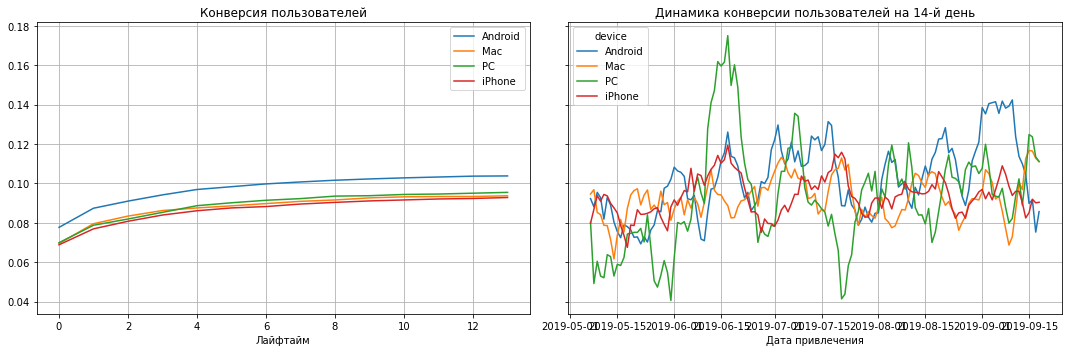

In [47]:
# посмотрим конверсию с разбивкой по устройствам отдельно по США

dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_usa_device, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

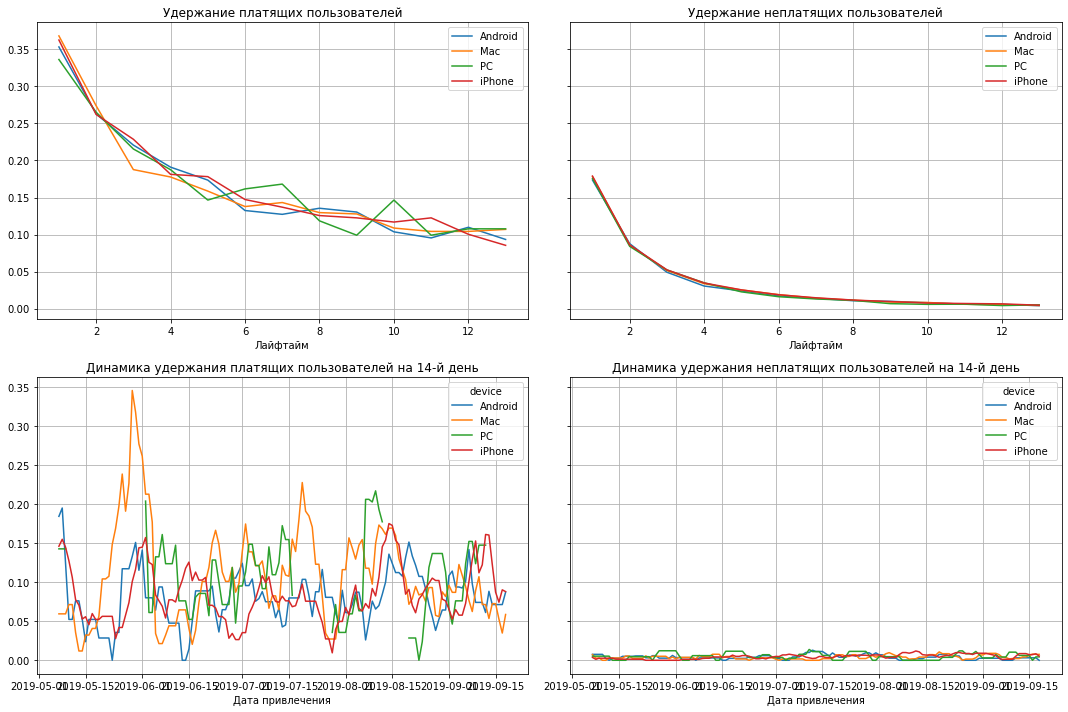

In [48]:
# смотрим удержание с разбивкой по устройствам в США

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_usa_device, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

А вот здесь есть отличия от общих показателей - максимальная конверсия у `Android` и `PC`, что крайне странно для родины `Iphone` и `Mac`. Возможно причина в технических нестыковках приложения с "яблочными устройствами". К удержанию обеих групп пользователей вопросов нет, здесь в целом все хорошо. 

**2. Посчитаем и визуализируем конверсию и удержание с разбивкой по странам**.

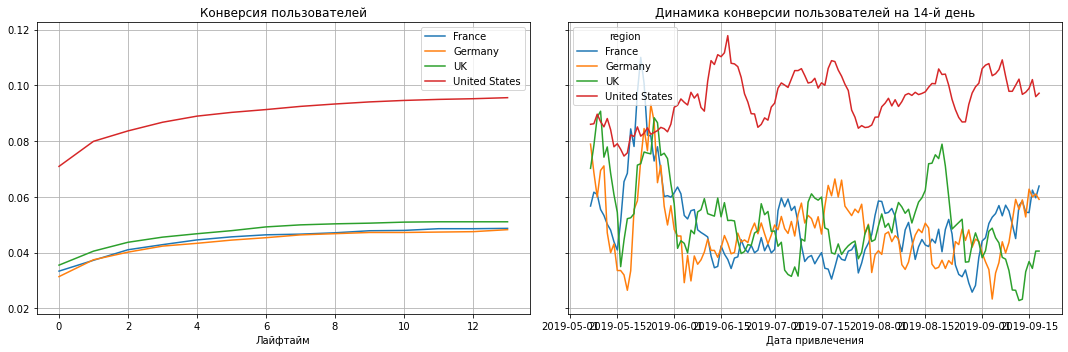

In [49]:
# посмотрим конверсию с разбивкой по странам

dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

При самой высокой стоимости привлечения клиенты из США демонстрируют на графиках самую высокую конверсию. 

Посмотрим, что скажут нам графики удержания.

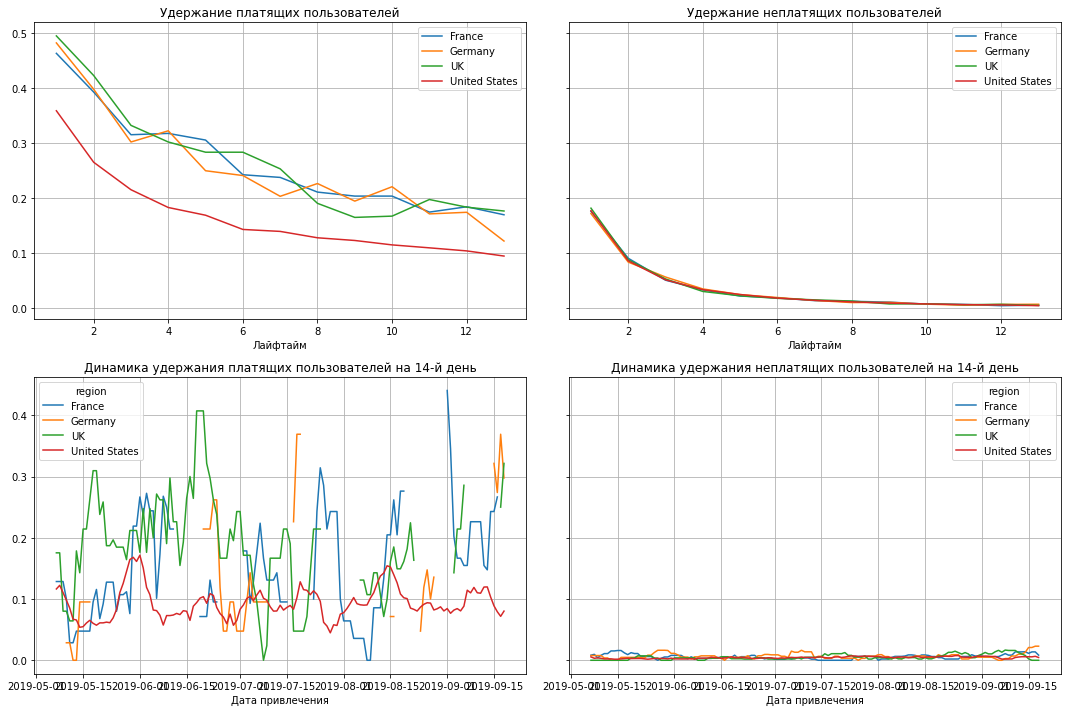

In [50]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

А вот уровень удержания платящих пользователей из CША самый низкий как в течение горизонта анализа, так и в динамике за изучаемый период. Удержание остальных стран находится на одинаковом уровне. Судя по пробелам на графике динамики удержания платящих пользователей на 14-й день в данных имеются пробелы.

**3. Посчитаем и визуализируем конверсию и удержание с разбивкой по рекламным каналам.**

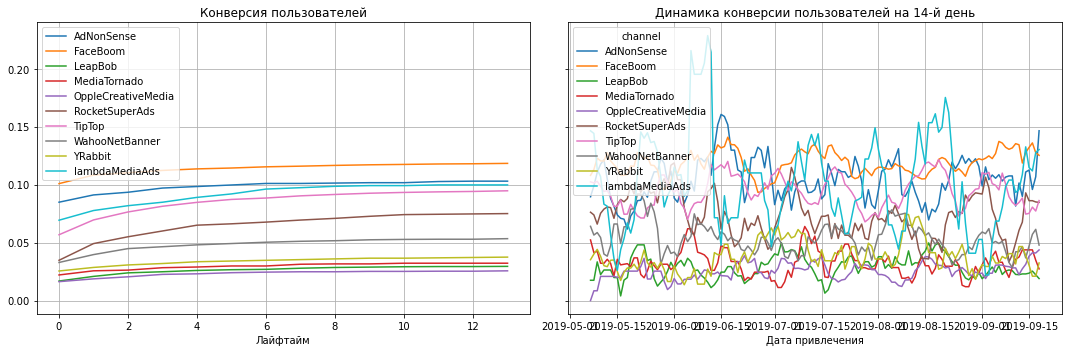

In [51]:
# посмотрим конверсию с разбивкой по рекламным каналам

dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Самый высокий уровень конверсии у пользователей, привлеченных через `FaceBoom`. 

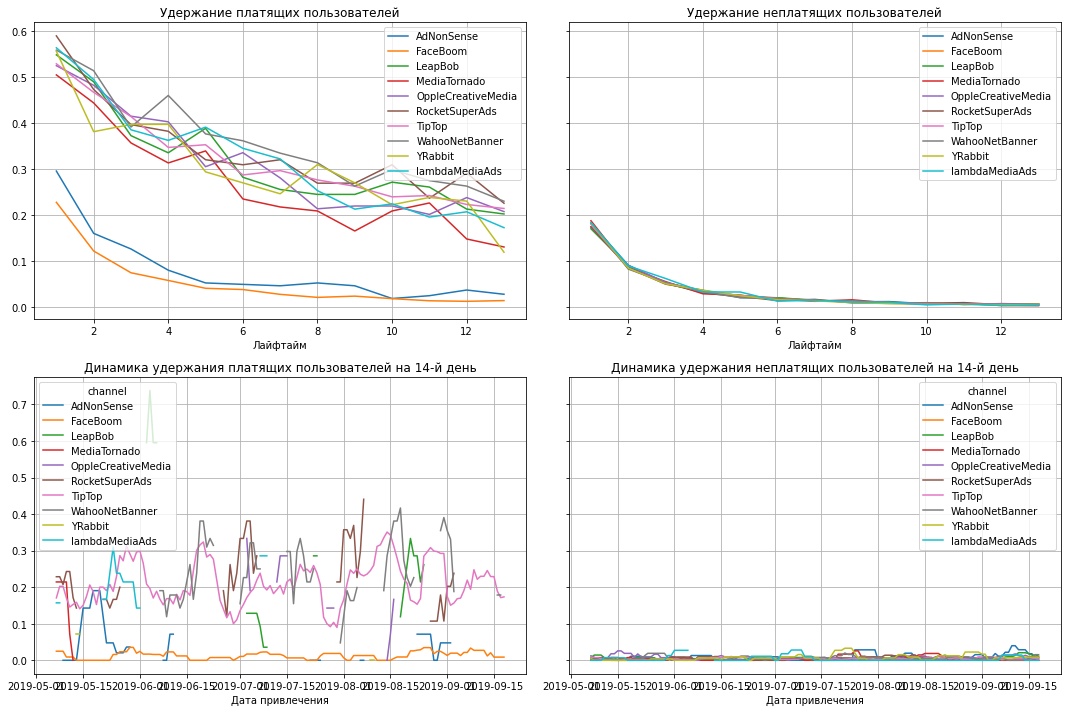

In [52]:
# смотрим удержание с разбивкой по рекламным каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Самый низкий уровень удержания к пользователей, пришедщих через рекламные каналы: `FaceBoom` и `AdNonSense`. К сожалению, данные неполные и графики динамики удержания платящих и неплатящих пользователей имеют многочисленные пробелы. Но даже здесь виден стабильно низкий уровень удержания платящих пользователей для `FaceBoom`.

### Ответы на поставленные вопросы

1. Окупается ли реклама в целом?

В целом рекламные расходы на привлечение пользователей не окупаются. На максимуме доходя до 80%.

2. Какие устройства, страны и каналы могут снижать окупаемость рекламы?

В целом уровень окупаемости тянут вниз:
  * устройства - `IPhone`, `Mac`, `Android`
  * страны - Америка
  * рекламные каналы - `TipTop`, `FaceBoom`, `AdNonSense`

3. Чем могут быть вызваны проблемы окупаемости?

Для ответа на этот вопрос поэкспериментируем с графиком общей окупаемости, исключая из общих данных те источники и страны, которые выявлены, как причины снижения окупаемости. 

Для начала освежим в памяти аналитические данные об источниках, которые хранятся в переменной `report_channel`. Данные об общей численности привлеченных пользователей хранит в себе переменная `all_users`, а данные о количестве платящих привлеченных пользователях - `all_payers`. Для начала дополним таблицу новыми столбцами:
   * `all_users_share` - процент пользователей, привлеченных определенным каналом, от общего количества пользователей,
   * `all_payers_share` - процент платящих пользователей, привлеченных определенным каналом, от общего количества плаятщих пользователей

In [53]:
# добавим новые столбцы с расчетами
report_channel['all_users_percent'] = (report_channel['users_count'] / all_users * 100).round(1)
report_channel['all_payers_percent'] = (report_channel['payers_count'] / all_payers * 100).round(1)
# посмотрим на обновленную таблицу
report_channel.sort_values(by='users_count', ascending=False)

,users_count,payers_count,payers_percent,all_users_percent,all_payers_percent
channel,,,,,
organic,56439,1160,2.1,37.6,13.1
FaceBoom,29144,3557,12.2,19.4,40.1
TipTop,19561,1878,9.6,13.0,21.1
OppleCreativeMedia,8605,233,2.7,5.7,2.6
LeapBob,8553,262,3.1,5.7,3.0
WahooNetBanner,8553,453,5.3,5.7,5.1
RocketSuperAds,4448,352,7.9,3.0,4.0
MediaTornado,4364,156,3.6,2.9,1.8
YRabbit,4312,165,3.8,2.9,1.9


**Посмотрим на общую окупаемость, исключив из данных самый дорогой источник привлечения пользователей `TipTop`**

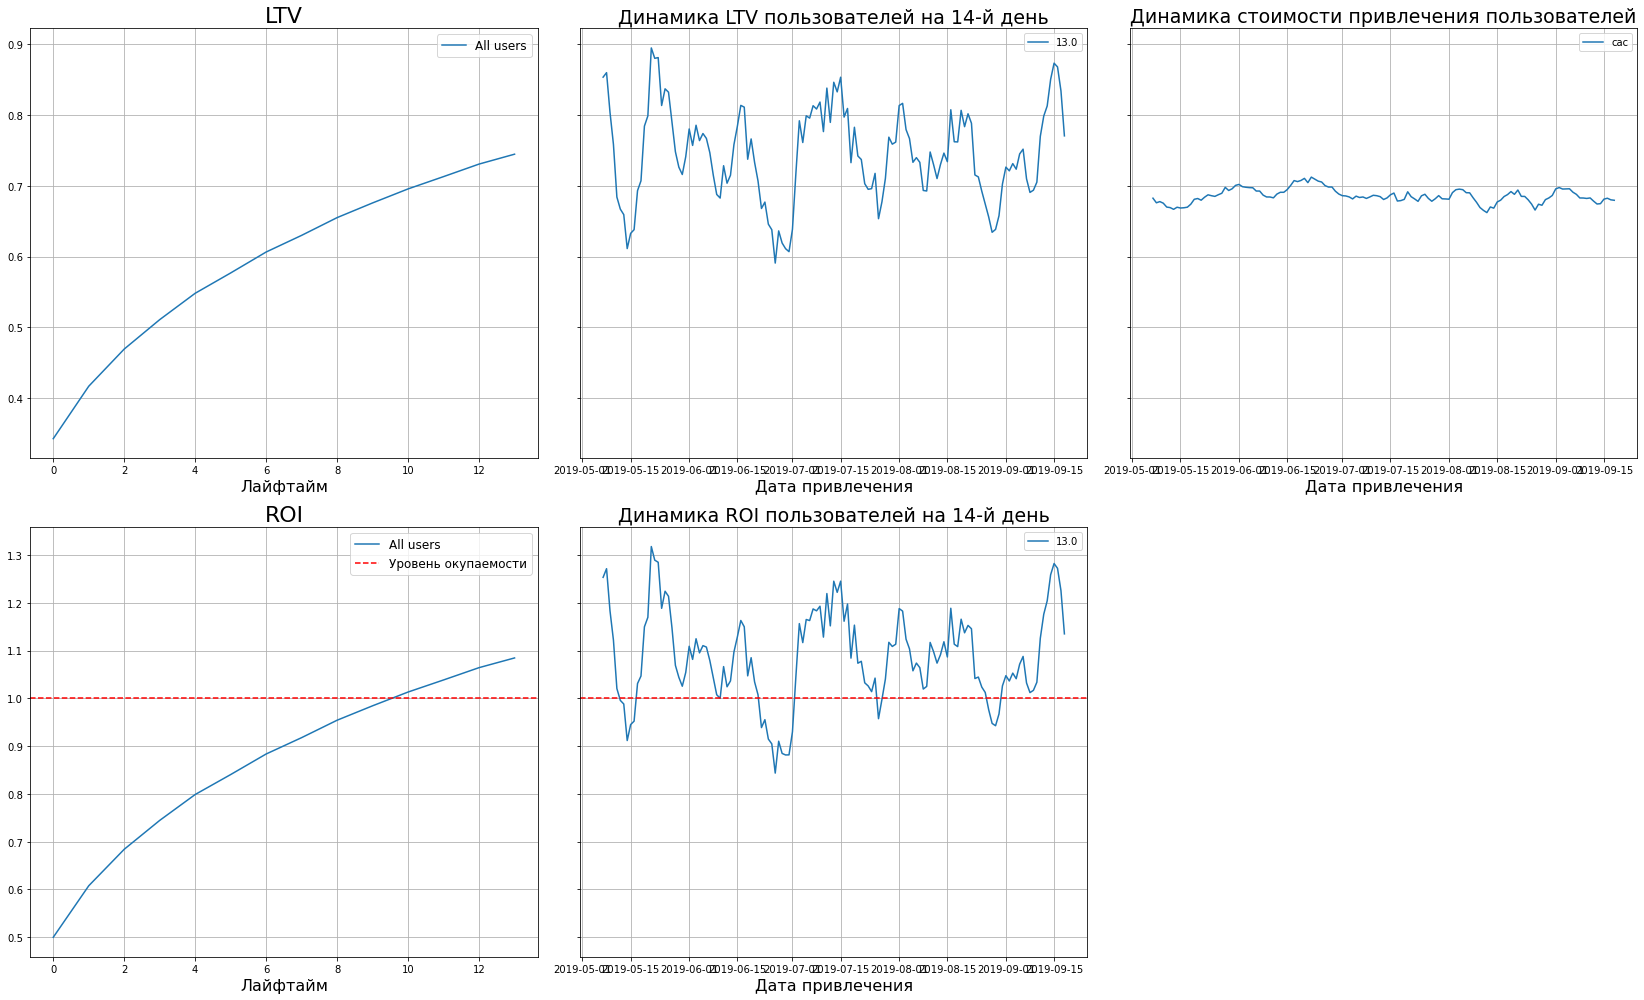

In [54]:
profiles_without_tiptop = profiles.query('channel != "TipTop"')

# считаем LTV и ROI без источника TipTop
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_tiptop, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Хотя этот канал и привлекает 21% всех платящих пользователей, но и существенно тянет общую окупаемость рекламы вниз за счет самой высокой и быстро растущей стоимости привлечения пользователей. Без расходов только на этот канал общая окупаемость вышла бы за пределы точки безубыточности уже на 10 день. Это может быть одной из причин общего падения окупаемости рекламы.

**Посмотрим на общую окупаемость, исключив из данных рекламный канал `FaceBoom`**

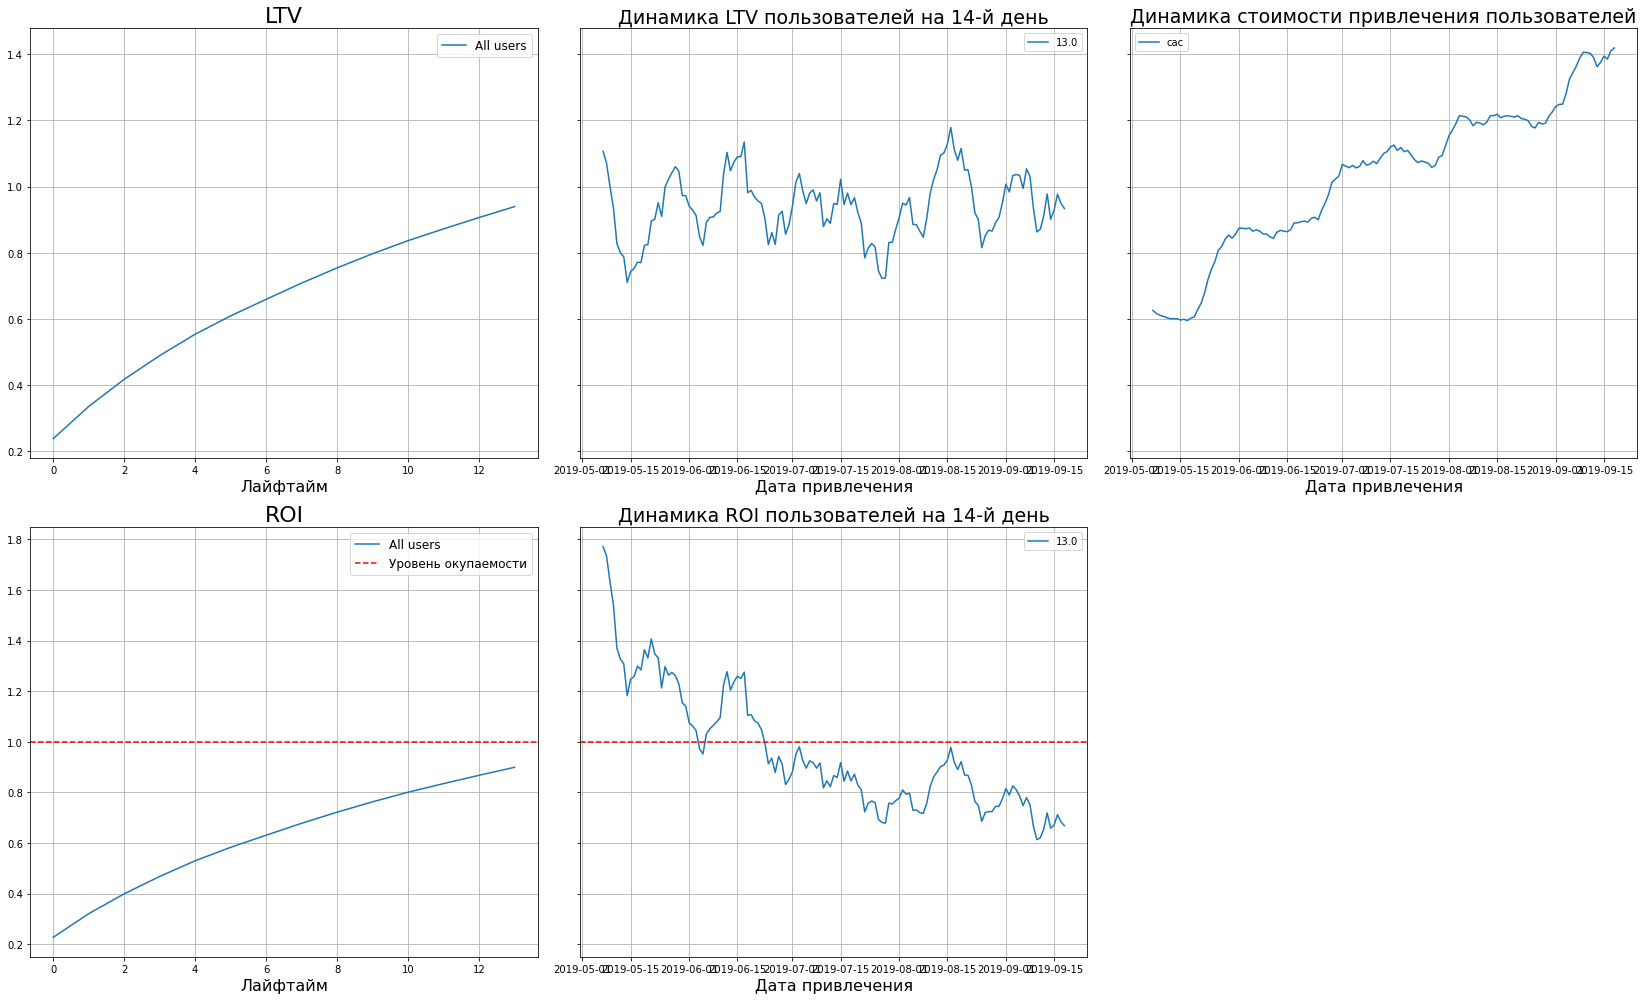

In [55]:
profiles_without_faceboom = profiles.query('channel != "FaceBoom"')

# считаем LTV и ROI без источника FaceBoom
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_faceboom, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Графики показали, что `Faceboom` немного тянет общую окупаемость вниз, но не является локомотивом это падения. При этом стоит учитывать, что 40% всех платящих пользователей пришли именно через этот источник.

**Посмотрим на общую окупаемость, исключив из данных Америку**

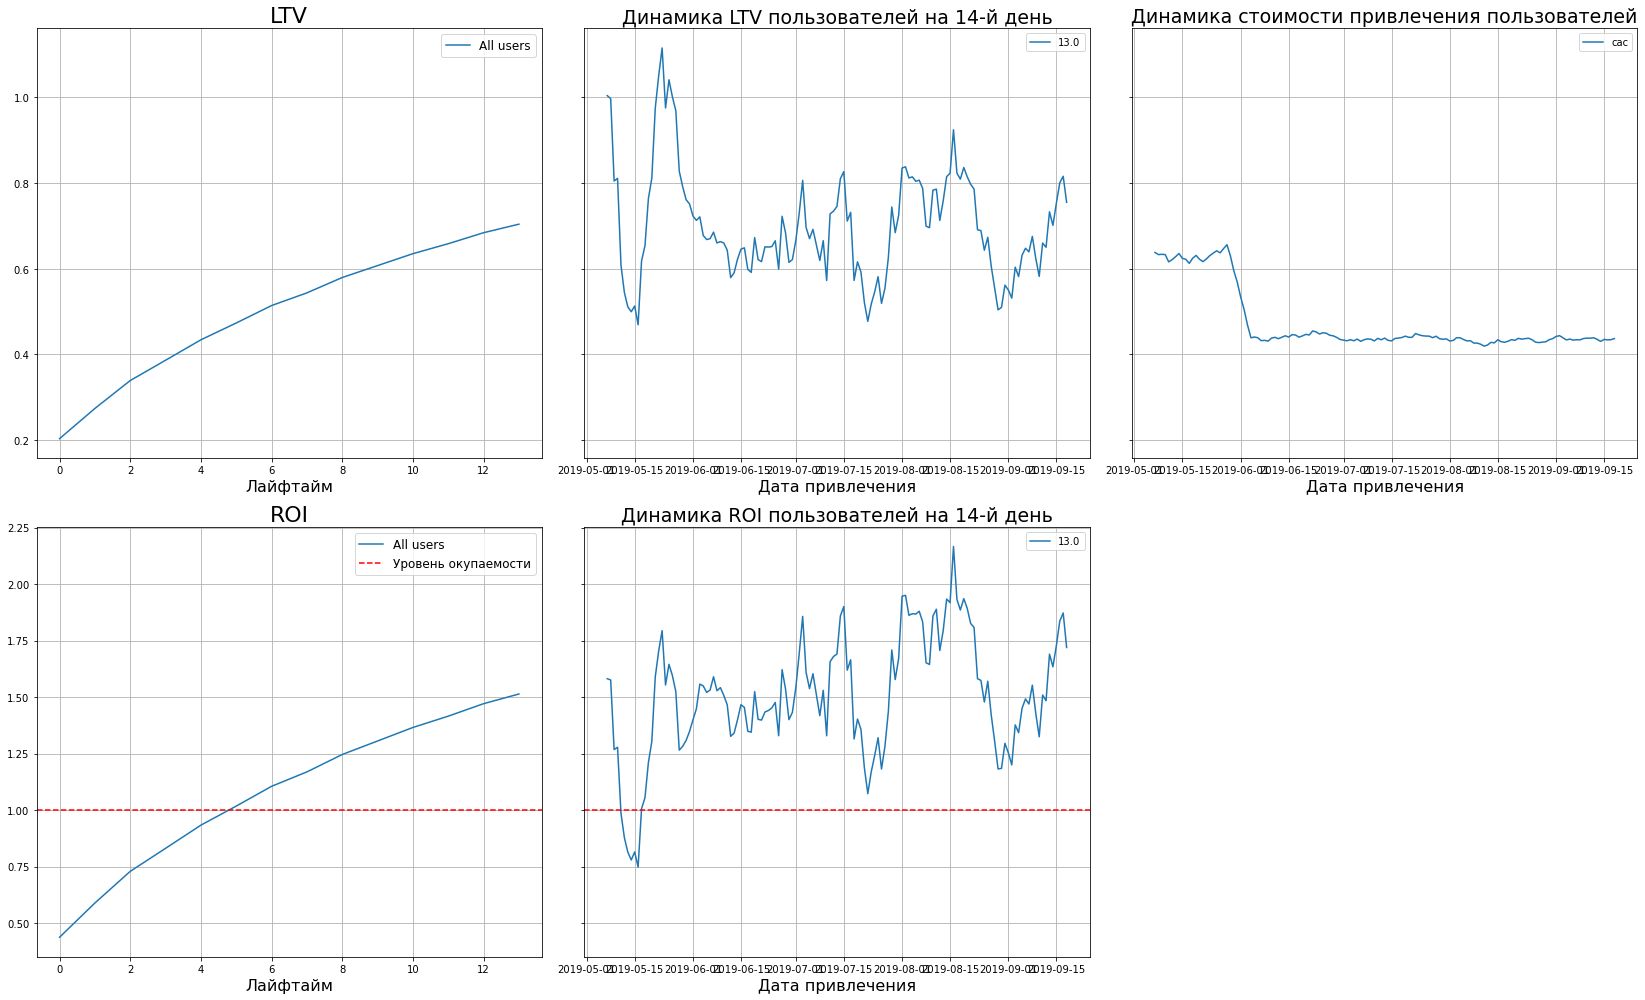

In [56]:
profiles_without_usa = profiles.query('region != "United States"')

# считаем LTV и ROI без источника USA
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_usa, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Безусловно без расходов на привлечение пользователей в Америке уже на 4-й день происходит выход за линию окупаемости. НО! Америка является не только лидером среди всех пользователей, но и лидером среди платящих пользователей приложения "Procrastinate Pro+". Возможно для привлечения пользователей в Америке выбраны не самые лучшие и ликвидные каналы.

Посмотрим как распределился рекламный бюджет по каждому источнику в разных странах.

In [57]:
profiles.pivot_table(index='channel', columns='region', values='acquisition_cost', aggfunc='sum').fillna(0).round(2)

region,France,Germany,UK,United States
channel,,,,
AdNonSense,1376.32,1229.28,1305.65,0.00
FaceBoom,0.00,0.00,0.00,32445.60
LeapBob,628.05,529.95,639.61,0.00
MediaTornado,0.00,0.00,0.00,954.48
OppleCreativeMedia,747.34,640.73,763.18,0.00
RocketSuperAds,0.00,0.00,0.00,1833.00
TipTop,0.00,0.00,0.00,54751.30
WahooNetBanner,1789.14,1552.97,1808.89,0.00
YRabbit,0.00,0.00,0.00,944.22


Поскольку потенциал платежеспособности у американских пользователей очень высокий, маркетологам стоит обратить внимание на источник привлечения:
 * `FaceBoom` - у него сама высокая конверсия среди остальных каналов, но самый слабый уровень удержания пользователей. В рамках проекта у нас недостаточно данных, чтобы определить истинную причину столь слабого удержания пользователей.
 * `TipTop`  - при хорошем уровне конвертации и удержания клиентов, этот канал обходится слишком дорого компании. Данный канал рекомендуется исключить из маркетингового бюджета и найти иные источники привлечения пользователей. 

## Вывод

В процесе анализа данных были проделаны следующие шаги:

1. Проведен обзор и предварительная подготовка дыннх к анализу:
  - стили заголовков приведены к "змеиному стилю",
  - отформатированы данные с датами,
  - заданы все необходимые аналитические функции.
 
 
2. Проведен исследовательский анализ данных:
  - созданы пользовательские профили,
  - определено лидерство стран, девайсов и рекламных каналов среди платящих пользователей.


3. Проведен маркетинговый анализ:
  - рассчитана общая сумма расходов на маркетинг,
  - рассчины и визуализированы изменение трат рекламного бюджета на каждый источник,
  - рассчитана средняя стоимость привлечения пользователя из каждого источника,
  - рассчитан средний CAC на пользователя для всего проекта.


4. Проведена оценка окупаемости рекламы:
  - проанализирован общий уровень окупаемости рекламы,
  - проанализирована окупаемость рекламы с разбивкой по рекламным каналам, странам и устройствам,
  - построены и изучины графики конверсии и удержания с разбивкой по устройствам, странам и рекламным каналам.
  - определено окупается ли реклама в целом,
  - определены устройства, страны и каналы, которые могут снижать окупаемость рекламы,
  - выдвинуты предположения, чем могут быть вызваны проблемы окупаемости.
  
На основании проведенного анализа можно утверждать слудющее:

1. Лидер по количеству привлеченных пользователей - Organic — естественный, органический трафик - 56439 пользователей. Однако уровень платящих пользователей среди них, увы, самый низкий - всего 2%.

По-настоящему "качественных" пользователей привлекает источник FaceBoom - здесь и высокий уровень общего количества привлеченных пользователей - 29144 пользователя, и самая высокая доля платящих пользователей - 12,2% по сравнению с другими источниками.

Меньше всего пользователей привлекает источник lambdaMediaAds - 2149, тем не менее доля платящих среди этих пользователей находится на хорошем уровне в 10,4%

2. Общий рекламный бюджет на привлечение пользователей составляет 105 497 долларов. В среднем же привлечение одного пользователя обходится компании в 1.13 доллара. 

Приоритет на расходование рекламного бюджета отдан двум основным источникам привлечения:

 * `TipTop` - 52% всего рекламного бюджета, при самом высоком CAC - 2.78 доллара - за одного пользователя среди всех источников.
 * `FaceBoom` - 31% всего рекламного бюджета, при CAC - 1.11 доллара, что в 2,5 раза дешевле, чем привлечение пользователей через `TipTop`, тогда как процент "качественных" и общее количество привлеченных
 
Меньше всего маркетологи вложились в источник привлечения пользователей `YRabbit`. 

Также стоит отметить, что расходы на привлечение пользователей через источник `TipTop` в течение изучаемого периода постоянно росли от $0.94 в мае до 3.72 в октябре. Больше ни один источник привлечения клиентов не имеет таких стремительных темпов роста стоимости привлечения.

3. В целом рекламные расходы на привлечение пользователей не окупаются. На максимуме доходя до 80%.

Полностью не окупаются инвестиции в следующие каналы привлечения пользователей:
  * в Америке: `TipTop`, `FaceBoom`
  * в Европе - `AdNonSense`. 
  
А лучшие показатели окупаемости у каналов: `YRabbit`, `lambdaMediaAds`, `MediaTornado` и `RocketSuperAds`.
Конверсия высокая у каналов: `AdNonSense`, `lambdaMediaAds`, `RocketSuperAds` и `WahooNetBanner`.
При этом лидеры по уровню удержания клиентов: `RocketSuperAds` и `WahooNetBanner`.

При таких высоких расходах на рекламу в Америке самая низкая окупаемость фанатов "яблочных" девайсов, хотя потенциал платежеспособности у американских клиентов очень высокий, что подтвердают самые высокие показатели конверсси пользователей Iphone и Mac и страны в целом. Но удержание клиентов из Америки и пользователей Iphone и Mac хуже остальных.

**Рекомендации для отдела маркетинга**

1. Переориентировать рекламный бюджет на другие каналы привлечения, исключив `TipTop`, либо добиться от этого источника конкурентоспособной стоимости привлечения пользователей без возможности ее роста. 
2. Детальнее проанализаровать источник привлечения `FaceBoom`. С одной стороны он привлек 40% всех платящих пользователей и, соответственно, имеет самую высокую конверсию, НО это с самым низким уровнем удержания клиентов. Стоит лучше разобраться в причинах.  
3. Обязательно диверсифицировать рекламный бюджет более равномерно между странами. В данный момент почти 83% всего рекламного бюджета уходит на привлечение американских пользователей. Развивать и другие европейские и азиатские рынки привлечения пользователей.
4. При распределении рекламного бюджета обратить внимание на следующие каналы привлечения: 
  * в Америке: `YRabbit`, `MediaTornado` и `RocketSuperAds` - каналы с самым высоким уровнем окупаемости, но и удержания клиентов; 
  * в Европе: `lambdaMediaAds` - имеет не только высокий уровень окупаемости, но и высокий уровень конверсии пользователей, а также `WahooNetBanner` с высоким уровнем удержания клиентов. 
5. Обратить внимание на низкий уровень удержания американских клиентов в том числе использующих Iphone и Mac. Необходимо разобраться в возможных причинах технического характера. 